In [1]:
!pip install "camelot-py[cv]"
!pip install --upgrade pypdf2

     |████████████████████████████████| 40 kB 33 kB/s  eta 0:00:011
     |████████████████████████████████| 5.6 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 283 kB 51.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 46.0 MB/s eta 0:00:01
     |████████████████████████████████| 55.7 MB 30.9 MB/s eta 0:00:01     |████████▊                       | 15.1 MB 17.7 MB/s eta 0:00:03     |███████████████████████▍        | 40.6 MB 30.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 55.9 MB/s eta 0:00:01
  Attempting uninstall: cryptography
    Found existing installation: cryptography 3.4.8
    Uninstalling cryptography-3.4.8:
      Successfully uninstalled cryptography-3.4.8
     |████████████████████████████████| 232 kB 1.1 MB/s eta 0:00:01


In [13]:
import camelot
import pandas as pd

url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition36_Full_Doc.pdf"

# Use camelot to directly extract the table instead of searching page by page
tables = camelot.read_pdf(url, pages='1-61', flavor='stream') 

for table in tables:
    if table.df.iloc[0,0].startswith("Domestic Consumption"):
        # Clean up dtypes 
        df = table.df.iloc[1:].infer_objects()
        # Set headers 
        new_header = df.iloc[0] 
        df = df[1:] 
        df.columns = new_header
    
        # Reset Index 
        df.reset_index(drop=True, inplace=True)
    
        # Print output 
        print("DataFrame from Camelot Extraction:")
        print(df)
        print("\nData Types:")
        print(df.dtypes)
        print("\nString Representation of DataFrame:")
        print(df.to_string(index=False))
        break


/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/camelot/parsers/stream.py:365: UserWarning: No tables found in table area 1
  warnings.warn(f"No tables found in table area {table_idx + 1}")


In [14]:
!pip install PyMuPDF
import requests
import fitz  # PyMuPDF

In [15]:
import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
from io import StringIO
# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition27_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()
    print(table_content)
else:
    print("Table not found in the PDF.")
# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame


    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Print the DataFrame

    print(df.to_string(index=False))
else:
    print("Table not found in the PDF.")

2–7
                                                                       TRANSPORTATION ENERGY DATA BOOK:  EDITION 27–2008
As data about alternative fuel use become available, an attempt is made to incorporate them into this table.  Sometimes
assumptions must be made in order to use the data.  Please see Appendix A for a description of the methodology used
to develop these data.
Table 2.5 
Domestic Consumption of Transportation Energy by Mode and Fuel Type, 2006a
(trillion Btu)
Gasoline
Diesel fuel
Liquified
petroleum
gas
Jet fuel
Residual
 fuel oil
Natural 
gas
Electricity
Total
HIGHWAY
16,919.1
5,210.3
61.5
15.3
0.8
22,207.0
Light vehicles
16,390.9
388.6
44.1
0.0
0.0
16,823.6
   Cars
9,225.7
52.0
9,277.7
   Light trucksb
7,137.6
336.6
44.1
7,518.3
   Motorcycles
27.6
27.6
Buses
6.8
172.5
0.2
15.3
0.8
195.6
   Transit
0.2
76.3
0.2
15.3
0.8
93.2
   Intercity
29.8
29.8
   School
6.6
66.4
73.0
Medium/heavy trucks
521.4
4,649.2
17.2
5,187.8
NONHIGHWAY
241.0
953.3
0.0
2,460.8
900.1
602.6

In [16]:
df

,Mode,Fuel Type,Gasoline,Diesel fuel,Liquefied petroleum gas,Jet fuel,Residual fuel oil,Natural gas,Electricity,Total
0,5,210.3,61.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,210.3,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,210.3,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,390.9,388.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16,390.9,44.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
85,Intercity,14.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,6,163.6,61.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2,460.8,900.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,2,460.8,617.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


                       Mode  Fuel Type  Gasoline  Diesel fuel  Liquefied petroleum gas  Jet fuel  Residual fuel oil  Natural gas  Electricity  Total
                          5      210.3      61.5          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5      210.3      15.3          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                          5      210.3       0.8          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16      390.9     388.6          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16      390.9      44.1          0.0                      0.0       0.0                0.0          0.0          0.0    0.0
                         16      390.9       0.0          0.0                      0.0       0.0          

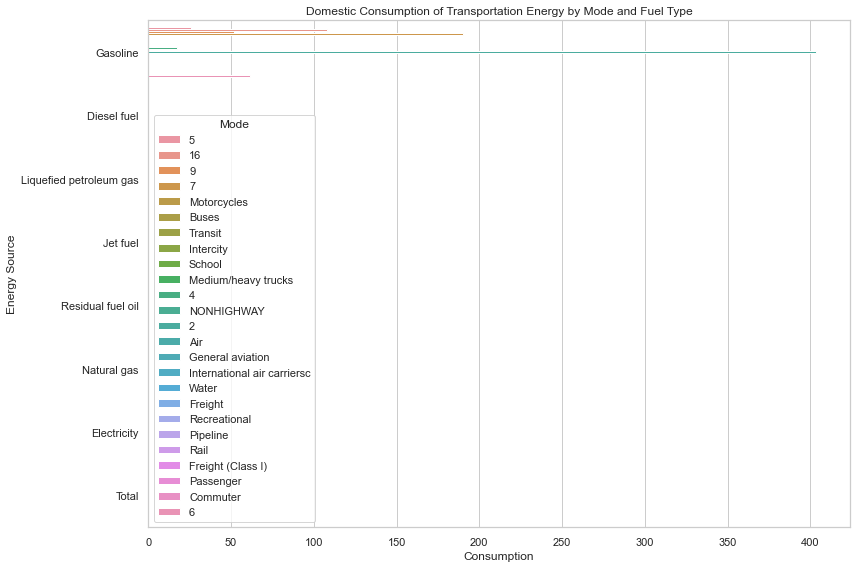

In [17]:
import requests
import fitz  # PyMuPDF
import camelot
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
import seaborn as sns  # Importing seaborn for enhanced visualization
from io import StringIO

# Open the PDF file from the URL
url = "https://tedb.ornl.gov/wp-content/uploads/2019/03/Edition27_Full_Doc.pdf"
pdf_bytes = requests.get(url).content

# Load the PDF document
pdf_document = fitz.open(stream=pdf_bytes)

# Search for the page containing the table
table_page = None
for page_number in range(len(pdf_document)):
    page = pdf_document.load_page(page_number)
    text = page.get_text()
    if "Domestic Consumption of Transportation Energy by Mode and Fuel Type" in text:
        table_page = page
        break

# Extract text content from the table page
if table_page:
    table_content = table_page.get_text()

    # Find the starting and ending indices
    start_index = table_content.find("Gasoline")
    end_index = table_content.find("Source") + len("Source")
    # Extract the desired portion of text
    desired_text = table_content[start_index:end_index]

    # Preprocess the text to make it more uniform and easier to parse
    lines = desired_text.split('\n')
    clean_lines = [line.strip() for line in lines if line.strip() != '']

    # This is a simplistic approach and might need adjustments
    # For demonstration, I assume each category and its data are separated by at least one blank line or irregular line breaks are present
    categories = []
    current_category = ''
    data = []
    for line in clean_lines:
        if line.replace('.', '', 1).isdigit() or '-' in line:  # This checks if the line is numerical or contains a dash (for data lines)
            data.append(current_category + ',' + line)
        else:
            current_category = line  # This assumes non-data lines are categories

    # Join the data lines into a single string to simulate a file object
    data_str = '\n'.join(data)

    # Convert the formatted string to a pandas DataFrame
    df = pd.read_csv(StringIO(data_str), header=None, names=['Mode', 'Fuel Type', 'Gasoline', 'Diesel fuel', 'Liquefied petroleum gas', 'Jet fuel', 'Residual fuel oil', 'Natural gas', 'Electricity', 'Total'])

    # Replace 'NA' values with 0
    df = df.fillna(0)

    # Print the DataFrame
    print(df.to_string(index=False))

    # Visualize the data
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Melt the DataFrame to long format for easier plotting
    df_long = df.melt(id_vars=['Mode', 'Fuel Type'], var_name='Energy Source', value_name='Consumption')

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x='Consumption', y='Energy Source', hue='Mode', ci=None)
    plt.title('Domestic Consumption of Transportation Energy by Mode and Fuel Type')
    plt.xlabel('Consumption')
    plt.ylabel('Energy Source')
    plt.tight_layout()
    plt.show()

else:
    print("Table not found in the PDF.")

In [24]:
# Install Xcode command line tools to fix the xcrun error
xcode-select --install

# After installation, configure git with your user details
git config --global VictorMoralesE
git config --global A01333897@tec.mx

# Initialize the local git repository if not already done
git init

# Add all files to the staging area
git add .

# Commit the files with a message
git commit -m "Initial commit with data processing scripts"

# Add your remote GitHub repository
git remote add origin https://github.com/VictorMoralesE/Transportation-Energy-Data-Book-.git

# Push the commit to the remote repository on GitHub
# You may need to set the upstream for the branch
git push -u origin main

SyntaxError: invalid syntax (833893510.py, line 5)

In [21]:
# Code to organize the local repository structure and push it to GitHub using Git commands

# This script assumes that you have git installed on your local machine
# and that you have initialized a local repository with 'git init'

# Importing os and subprocess to run Git commands
import os
import subprocess

# Function to run shell commands
def run_command(command):
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    if process.returncode != 0:
        print(f"Error: {stderr.decode().strip()}")
        return False
    print(stdout.decode().strip())
    return True

# Set up your local repository directory structure
directories = [
    "data_processing", # Directory for data processing scripts
    "data_analysis",   # Directory for data analysis scripts
    "data_visualization", # Directory for data visualization scripts
    "data",            # Directory for storing data files
    "outputs"          # Directory for outputs of your programs
]

# Create the directories if they don't exist
for directory in directories:
    os.makedirs(directory, exist_ok=True)

# Create a new Python file with your code in the data_processing directory
script_filename = "data_processing/transport_energy_data_processing.py"
with open(script_filename, "w") as file:
    file.write("""
# Your code here
# (The Python code provided earlier would go here)
""")

# Initialize the local repository if it hasn't been done already
run_command("git init")

# Add all files to the staging area
run_command("git add .")

# Commit the changes
run_command('git commit -m "Initial commit with data processing scripts"')

# Add the remote repository
run_command("https://github.com/VictorMoralesE/Transportation-Energy-Data-Book-.git")

# Push the changes to GitHub
# Replace 'main' with your branch name if it is different
run_command("git push -u origin main")

Error: xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun
Error: xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun
Error: xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun
Error: /bin/sh: https://github.com/VictorMoralesE/Transportation-Energy-Data-Book-.git: No such file or directory
Error: xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun


False